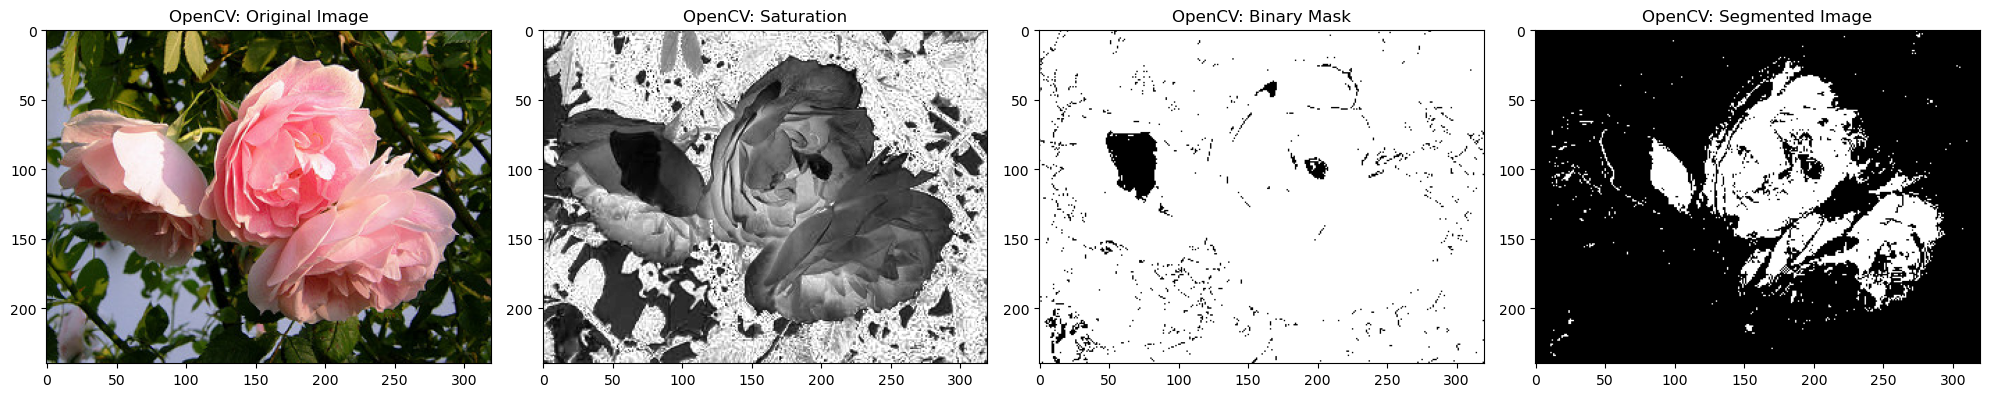

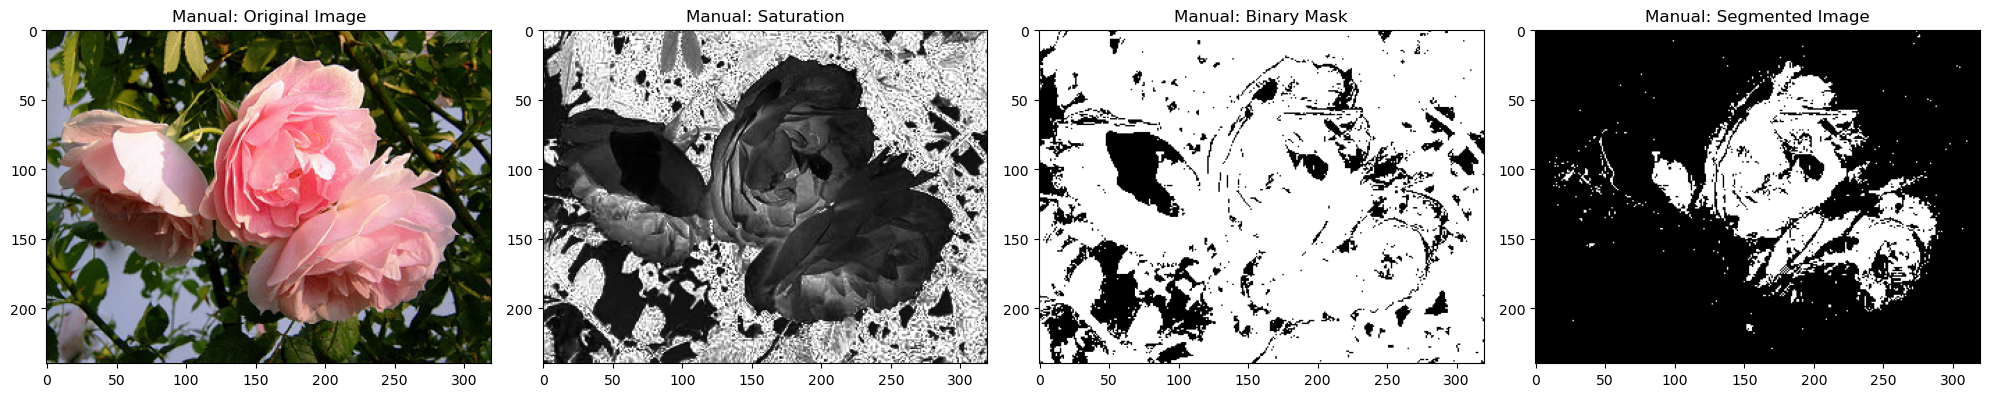

In [2]:
"""
Theoretical Concept:
--------------------
SEGMENTATION IN HSI COLOR SPACE:
Segmentation in the HSI (Hue, Saturation, Intensity) color space is widely used for color-based image segmentation. 
The HSI space separates chromatic content (hue and saturation) from intensity, making it ideal for tasks where 
color information is critical while intensity is less relevant.

- **Hue (H)** represents the color type (e.g., red, green, blue).
- **Saturation (S)** indicates the purity of the color (how much it is mixed with white).
- **Intensity (I)** represents the brightness of the color.

### Key Steps in HSI Segmentation:
1. **Conversion to HSI Space**:
   The image is first converted from RGB to HSI space. This can be achieved using OpenCV (which uses HSV as a close approximation) 
   or through manual implementation using mathematical formulas.

2. **Thresholding the Saturation Image**:
   The saturation component is used as a mask to isolate regions of interest in the hue image. Thresholding helps to retain regions 
   with sufficient color purity and suppress noise.

3. **Masking the Hue Image**:
   The binary mask obtained from the saturation thresholding step is multiplied with the hue component. This helps to focus on the 
   desired color regions.

4. **Thresholding the Masked Hue Image**:
   The resultant image from the previous step is thresholded again to isolate regions that match the desired hue (color) range.

5. **Result**:
   The final binary image represents the segmented regions based on the specified color properties.

### Example Use Case:
The program segments a reddish region in a flower image. The following process is applied:
- Convert the image to HSI.
- Threshold the saturation to focus on regions with prominent colors.
- Use the hue component to identify regions with reddish hues.
- Display the segmentation results.

### Comparison:
The implementation compares OpenCV's built-in conversion and a manual implementation of the RGB-to-HSI transformation to highlight 
their performance and accuracy.

### Output:
The program displays the following results:
1. Original image.
2. Saturation component of the HSI image.
3. Binary mask from saturation thresholding.
4. Segmented image after hue masking and thresholding.

### Libraries Used:
- **OpenCV**: For image loading, processing, and HSI (HSV) conversion.
- **NumPy**: For numerical computations and manual HSI conversion.
- **Matplotlib**: For visualization of intermediate and final results.

This implementation demonstrates a modular approach, allowing the segmentation to be extended or adapted for other color-based 
segmentation tasks.
"""

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Step 1: Define functions
def rgb_to_hsi(image):
    """Convert RGB image to HSI color space manually."""
    r, g, b = image[:, :, 0] / 255.0, image[:, :, 1] / 255.0, image[:, :, 2] / 255.0
    intensity = (r + g + b) / 3
    saturation = 1 - (3 / (r + g + b + 1e-6) * np.min([r, g, b], axis=0))
    num = 0.5 * ((r - g) + (r - b))
    den = np.sqrt((r - g) ** 2 + (r - b) * (g - b)) + 1e-6
    hue = np.arccos(num / den)
    hue[b > g] = 2 * np.pi - hue[b > g]
    hue /= 2 * np.pi  # Normalize hue to range [0, 1]
    return hue, saturation, intensity

def segment_image(hue, saturation, saturation_threshold=0.1, hue_threshold=0.9):
    """Segment the image using HSI thresholds."""
    binary_mask = (saturation > saturation_threshold).astype(np.float32)
    masked_hue = hue * binary_mask
    binary_segmented = (masked_hue > hue_threshold).astype(np.float32)
    return binary_mask, binary_segmented

def visualize_results(image, saturation, binary_mask, binary_segmented, title_prefix):
    """Display segmentation results."""
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))
    ax[0].imshow(image)
    ax[0].set_title(f'{title_prefix}: Original Image')
    ax[1].imshow(saturation, cmap='gray')
    ax[1].set_title(f'{title_prefix}: Saturation')
    ax[2].imshow(binary_mask, cmap='gray')
    ax[2].set_title(f'{title_prefix}: Binary Mask')
    ax[3].imshow(binary_segmented, cmap='gray')
    ax[3].set_title(f'{title_prefix}: Segmented Image')
    plt.tight_layout()
    plt.show()

# Step 2: Load the image
image_path = os.path.join(os.getcwd(), 'data', 'images', 'roses.jpg')  # Replace with your image path
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Step 3: Convert and segment using OpenCV
hsi_image_cv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
hue_cv, saturation_cv, intensity_cv = cv2.split(hsi_image_cv)
hue_cv = hue_cv / 179.0  # Normalize hue to [0, 1]
saturation_cv = saturation_cv / 255.0

binary_mask_cv, binary_segmented_cv = segment_image(hue_cv, saturation_cv)

# Step 4: Convert and segment using manual implementation
hue_manual, saturation_manual, intensity_manual = rgb_to_hsi(image_rgb)
binary_mask_manual, binary_segmented_manual = segment_image(hue_manual, saturation_manual)

# Step 5: Visualize results
visualize_results(image_rgb, saturation_cv, binary_mask_cv, binary_segmented_cv, "OpenCV")
visualize_results(image_rgb, saturation_manual, binary_mask_manual, binary_segmented_manual, "Manual")
